In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import LSTM, Dense, Dropout, InputLayer
from keras. models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

landmark = "lunge_landmark_list.csv"

In [2]:
val_data = pd.read_csv("lunge_landmark.csv",header=None)
predict_val = []
predict_val = val_data.iloc[:,1:-1].values

predict_val = np.array(predict_val)
print(predict_val)

[[ 3.59708160e-01  3.39032948e-01  1.32435904e-04  9.94135499e-01
   3.66261244e-01  3.25931638e-01 -1.97877083e-02  9.92705762e-01
   3.67926568e-01  3.25662017e-01 -1.97835155e-02  9.91642773e-01
   3.69760960e-01  3.25352520e-01 -1.98373366e-02  9.94493306e-01
   3.66504997e-01  3.25631768e-01  1.41018610e-02  9.96573448e-01
   3.68278921e-01  3.25127423e-01  1.41463950e-02  9.95963931e-01
   3.70284110e-01  3.24534923e-01  1.41520472e-02  9.96535122e-01
   3.86533976e-01  3.30684006e-01 -7.00394660e-02  9.90005076e-01
   3.86926264e-01  3.28840166e-01  7.06672743e-02  9.95655000e-01
   3.65125477e-01  3.53493571e-01 -1.94699205e-02  9.94630456e-01
   3.65274459e-01  3.52994263e-01  2.34412663e-02  9.96192336e-01
   4.06528890e-01  4.07295138e-01 -1.56155169e-01  9.99250412e-01
   4.14753228e-01  3.99004608e-01  1.53304711e-01  9.98983860e-01
   4.06323433e-01  6.00521803e-01 -9.90252793e-02  9.96262133e-01
   4.11120325e-01  5.94424665e-01  9.89951342e-02  9.97752249e-01
   2.95537

In [3]:
lunge_data = pd.read_csv(landmark, header=None)

X = []
y = []

X = lunge_data.iloc[:,1:-1].values
print (X[0])
y = lunge_data.iloc[:,-1].values
print (y[0])
    
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

[ 0.40194076  0.33393312 -0.13601847  0.74734479  0.41919982  0.31996542
 -0.16840395  0.77305055  0.42272061  0.32027501 -0.1683505   0.78490859
  0.42605343  0.32060248 -0.16835988  0.77291518  0.41943327  0.31866401
 -0.09823107  0.76121753  0.42296043  0.31822973 -0.09815498  0.76437843
  0.4262937   0.31773436 -0.09822591  0.75611573  0.45860475  0.32653132
 -0.27514914  0.77641994  0.45384064  0.32286662  0.055465    0.78141594
  0.41489536  0.34611762 -0.17283009  0.79423821  0.41296837  0.34472665
 -0.07793105  0.78382212  0.51176745  0.39594656 -0.44987121  0.820526
  0.45525628  0.38703406  0.16695996  0.84672314  0.51330525  0.637793
 -0.18129471  0.6978699   0.41127402  0.62975651  0.18091886  0.69764775
  0.70678967  0.75225955 -0.23058493  0.59346741  0.16740066  0.67898726
 -0.10641927  0.61728048  0.90645015  0.83872271  0.05114789  0.61414456
  0.16688615  0.83916909  0.09128548  0.58564365  0.92788547  0.84300661
  0.07047405  0.6024279   0.19456562  0.87317502  0.098

In [4]:
#shuffle and split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)

In [5]:
# test_model = load_model('proto_model_test.h5')

In [6]:
# # print(X_test)

# from random import randrange
# random_seed = randrange(0,201)
# # print(len(X_test))
# # print(len(y_test))
# test_res = test_model.predict(np.array([X_test[random_seed]]))
# print(np.squeeze(test_res))
# print('Prediction:', np.argmax(np.squeeze(test_res)))
# print('Label:', y_test[random_seed])
# print('Validity:', str(np.argmax(np.squeeze(test_res))) == str(y_test[random_seed]))

In [7]:
#build model
model = Sequential()
model.add(InputLayer(shape=(92,)))
model.add(Dense(32, activation="relu"))
# model.add(Dense(20, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=2, activation="softmax"))
model.compile(optimizer="adam", metrics=['accuracy'], loss="sparse_categorical_crossentropy")
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         2,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,218 (20.38 KB)

 Trainable params: 5,218 (20.38 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#define callback and start training
es_callback = EarlyStopping(monitor="val_loss", 
                            verbose=1, 
                            mode="min", 
                            patience=25)
# es_callback = EarlyStopping(monitor="accuracy", 
#                             verbose=1, 
#                             mode="max", 
#                             patience=25)

history=model.fit(X_train, y_train, 
                  epochs=500, 
                  batch_size=64, 
                  validation_data=(X_test, y_test), 
                  verbose=1, 
                  callbacks=[es_callback])

Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5279 - loss: 0.7462 - val_accuracy: 0.5920 - val_loss: 0.6836
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5336 - loss: 0.6982 - val_accuracy: 0.7463 - val_loss: 0.6623
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6178 - loss: 0.6659 - val_accuracy: 0.7811 - val_loss: 0.6381
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6691 - loss: 0.6442 - val_accuracy: 0.8010 - val_loss: 0.6060
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6617 - loss: 0.6253 - val_accuracy: 0.8060 - val_loss: 0.5683
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7122 - loss: 0.5912 - val_accuracy: 0.8010 - val_loss: 0.5294
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7792 - loss: 0.5400 - val_accuracy: 0.8259 - val_loss: 0.4799
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7656 - loss: 0.5000 - val_accuracy: 0.8308 - 

In [9]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8847 - loss: 0.2818 


In [10]:
train_loss, train_acc = model.evaluate(X_train, y_train, batch_size=128)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9185 - loss: 0.1944 


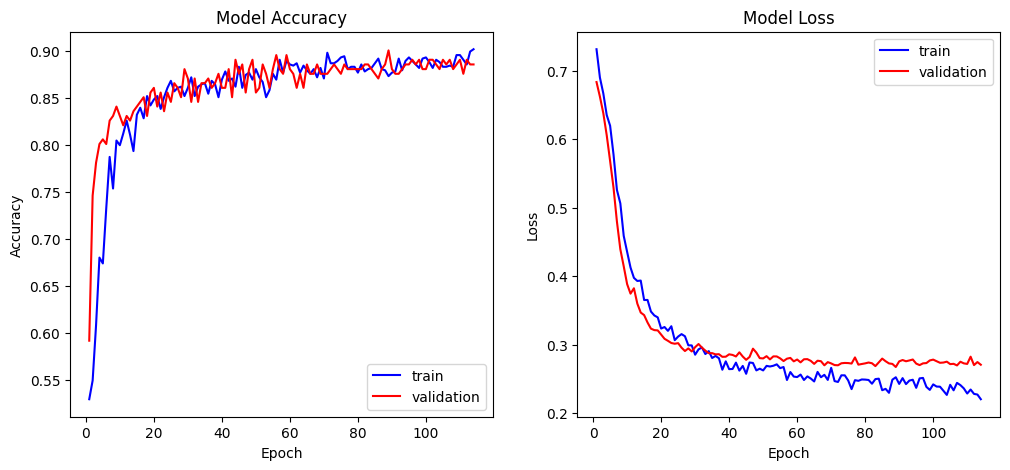

In [11]:
def plot_history(history):
    acc = history.history["accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    val_accuracy = history.history["val_accuracy"]
    
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, "b", label="train")
    plt.plot(x, val_accuracy, "r", label="validation")
    plt.legend(loc="best")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy")
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, "b", label="train")
    plt.plot(x, val_loss, "r", label="validation")
    plt.legend(loc="best")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Model Loss")
    
    # plt.savefig("graph/HandPostureModelTrainingHistory1.png")
    
plot_history(history)

In [12]:

res = model.predict(np.array([predict_val[0]]))
print(np.squeeze(res))
print(np.argmax(np.squeeze(res)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[0.9883305  0.01166957]
0


In [13]:
model.save('proto_model_test.h5')